In [51]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import cv2



#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [52]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

センシング開始
0.0 16.0
餌を買う
16.0 20.0
逃げる
20.0 40.0
紙を上げる
40.0 44.0
餌やり
44.0 83.0
なでなで挑戦
83.0 88.0
餌やり
88.0 120.0
餌終わり
120.0 123.0
どつかれる
123.0 124.0
どつかれ終了
124.0 130.0
どつかれる
130.0 131.0
どつかれ終了
131.0 146.0
センシング終了
146.0 158.271


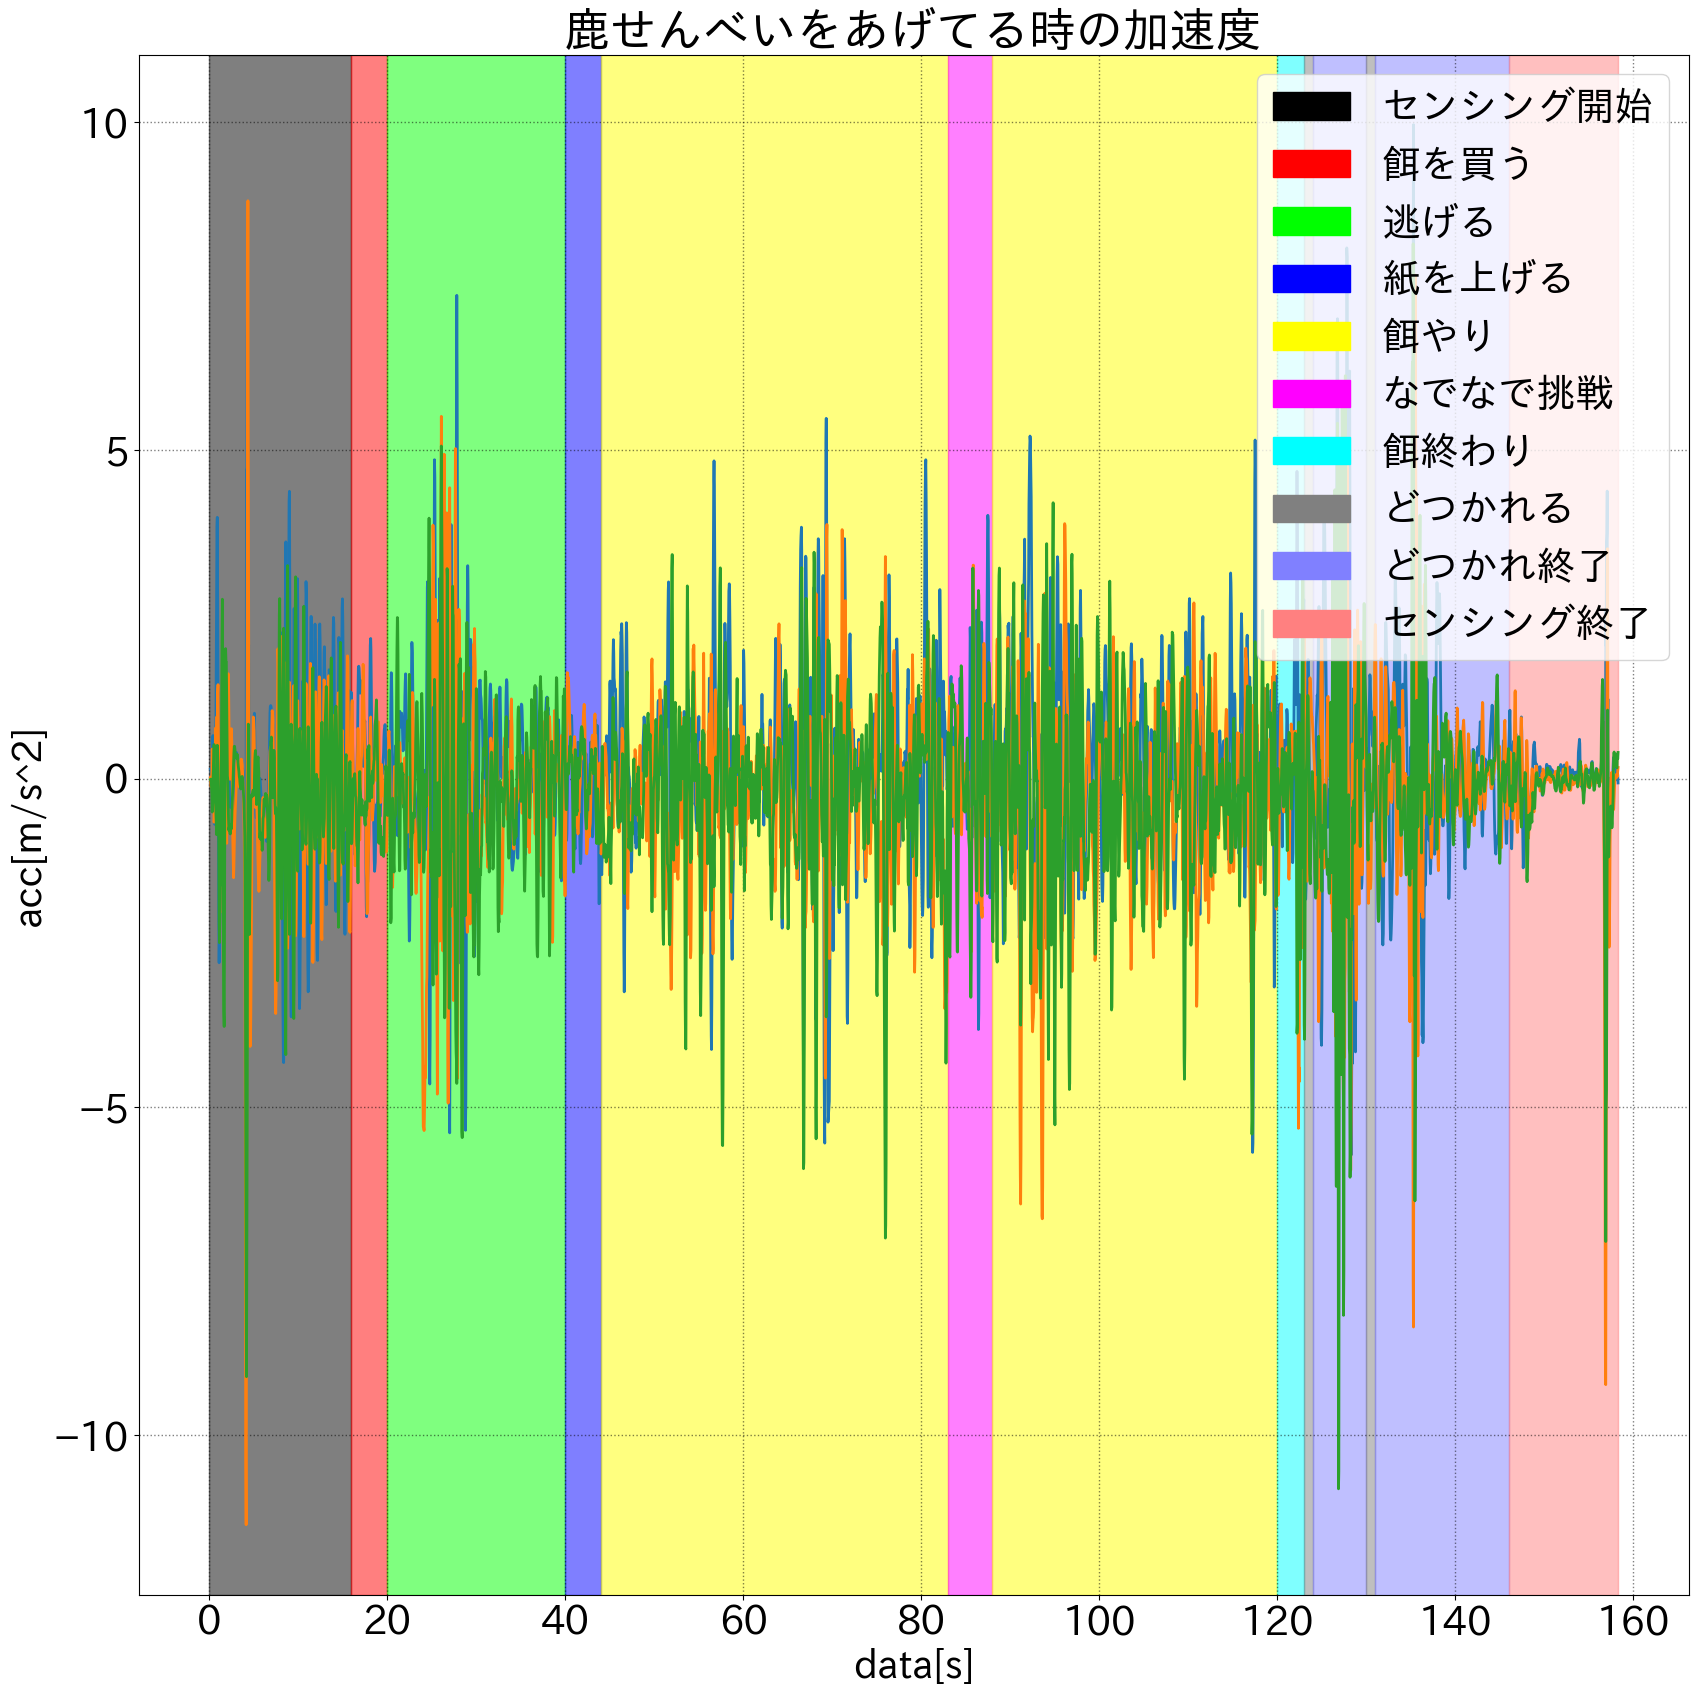

In [53]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("鹿せんべいをあげてる時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "餌を買う": "#ff0000",
    "逃げる": "#00ff00",
    "紙を上げる": "#0000ff",
    "餌やり": "#ffff00",
    "なでなで挑戦": "#ff00ff",
    "餌終わり": "#00ffff",
    "どつかれる": "#808080",
    "どつかれ終了": "#8080ff",
    "センシング終了": "#ff8080",
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000
    else :
        end_time = (acc["time"].iloc[-1] - acc["time"][0]) / 1000

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

センシング開始
5.0 21.0
餌を買う
21.0 25.0
逃げる
25.0 45.0
紙を上げる
45.0 49.0
餌やり
49.0 88.0
なでなで挑戦
88.0 93.0
餌やり
93.0 125.0
餌終わり
125.0 128.0
どつかれる
128.0 129.0
どつかれ終了
129.0 135.0
どつかれる
135.0 136.0
どつかれ終了
136.0 151.0
センシング終了
151.0 163.271


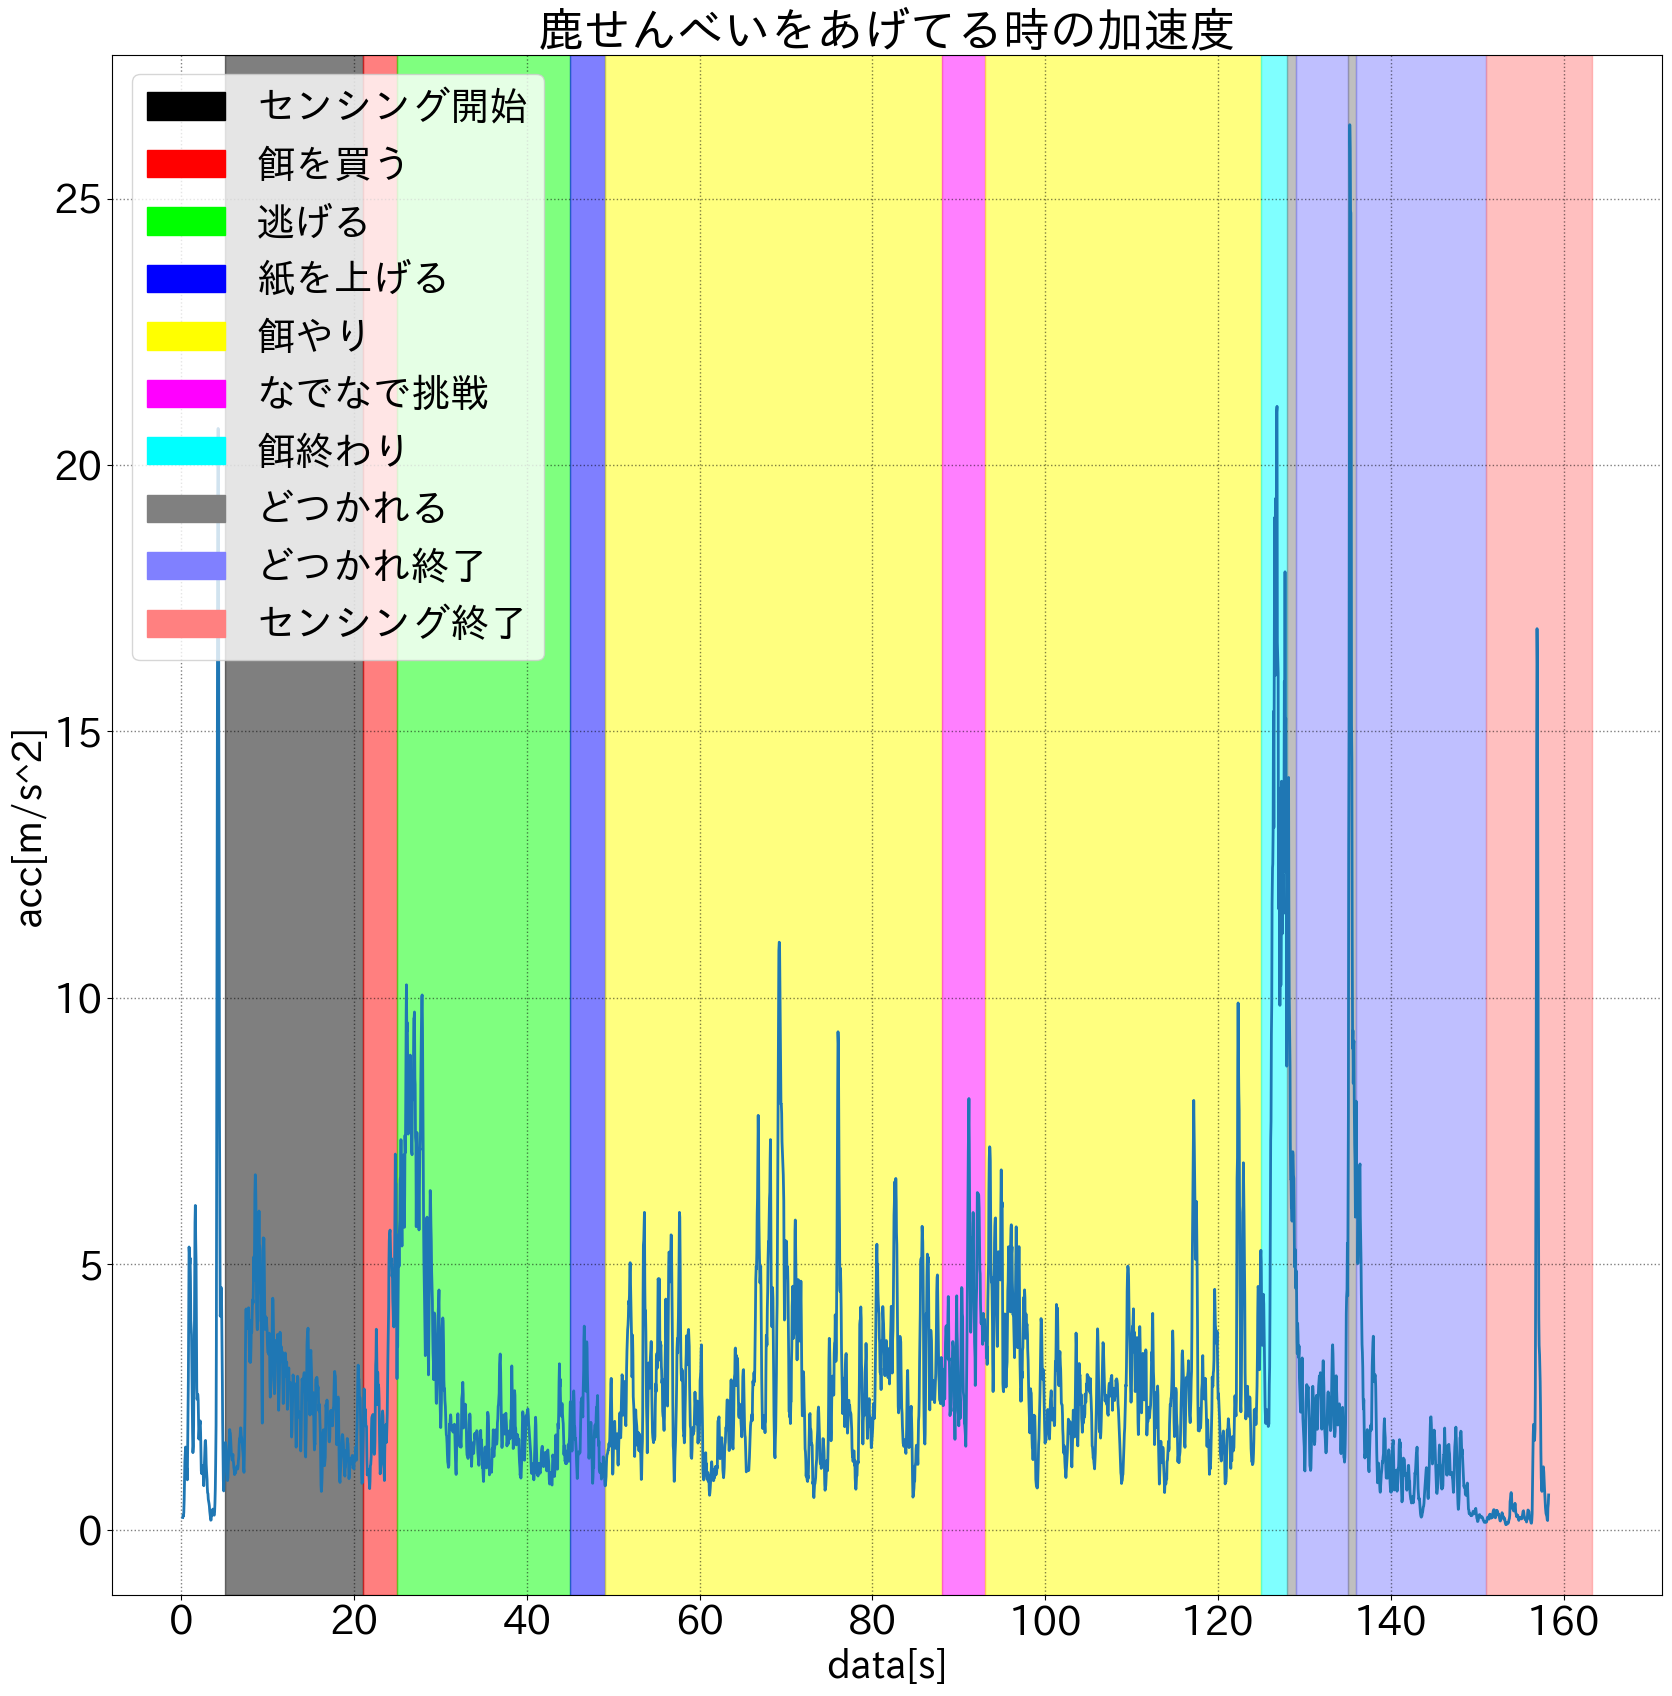

In [54]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("鹿せんべいをあげてる時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去

norm = np.sqrt(acc["x"]**2 + acc["y"]**2 + acc["z"]**2)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    norm.rolling(window=5).mean(),
    label="norm",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "餌を買う": "#ff0000",
    "逃げる": "#00ff00",
    "紙を上げる": "#0000ff",
    "餌やり": "#ffff00",
    "なでなで挑戦": "#ff00ff",
    "餌終わり": "#00ffff",
    "どつかれる": "#808080",
    "どつかれ終了": "#8080ff",
    "センシング終了": "#ff8080",
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000
    else :
        end_time = (acc["time"].iloc[-1] - acc["time"][0]) / 1000

    start_time = start_time + 5
    end_time = end_time + 5

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper left")

plt.show()

0.02459705189200801
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3888    0.362662
3889    0.304567
3890    0.367650
3891    0.390329
3892    0.460169
Length: 3893, dtype: float64
[  5203.87567429  14310.65810429  23417.44053429  32524.22296429
  41631.0053943   50737.7878243   59844.5702543   68951.35268431
  78058.13511431  87164.91754431  96271.69997431 105378.48240432
 114485.26483432 123592.04726432 132698.82969432 141805.61212433
 150912.39455433]
      time  content
0     4000  センシング開始
1    20000     餌を買う
2    24000      逃げる
3    44000    紙を上げる
4    48000      餌やり
5    87000   なでなで挑戦
6    92000      餌やり
7   124000     餌終わり
8   127000    どつかれる
9   128000   どつかれ終了
10  134000    どつかれる
11  135000   どつかれ終了
12  150000  センシング終了
0 16000
16000 20000
20000 40000
40000 44000
44000 83000
83000 88000
88000 120000
120000 123000
123000 124000
124000 130000
130000 131000
131000 146000
146000 1694932479488


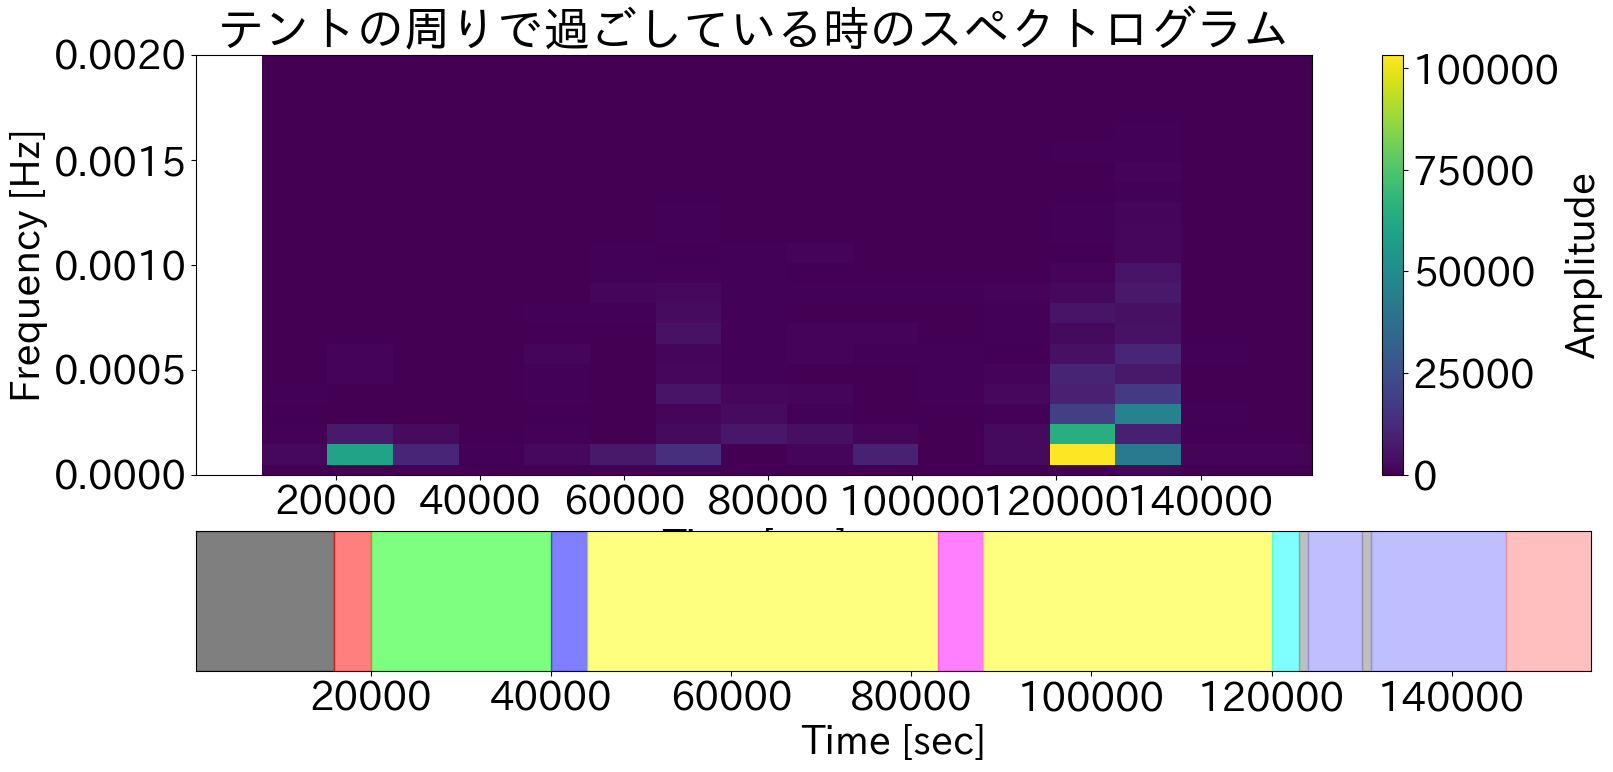

In [55]:
# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point for data_point in data]
    time_interval = time_stamps[-1] - time_stamps[0]
    sampling_frequency = 1 / (time_interval / len(data))
    return sampling_frequency


# 以下、元のコードからの続き
x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

fs = calculate_sampling_frequency(acc["time"])
norm = abs(norm_acc)

# スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(norm, fs)

print(fs)
print(norm)
print(t)

# サブプロットを作成
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# 画像を大きく表示する
fig.set_size_inches(18, 8)

# スペクトログラムをax1に表示
cax = ax1.pcolormesh(t, f, Sxx)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title("テントの周りで過ごしている時のスペクトログラム")

# 縦軸は0.001を最大値にする
ax1.set_ylim(0, 0.002)

cbar1 = fig.colorbar(cax, ax=ax1)
cbar1.set_label("Amplitude")

print(ans)


# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "餌を買う": "#ff0000",
    "逃げる": "#00ff00",
    "紙を上げる": "#0000ff",
    "餌やり": "#ffff00",
    "なでなで挑戦": "#ff00ff",
    "餌終わり": "#00ffff",
    "どつかれる": "#808080",
    "どつかれ終了": "#8080ff",
    "センシング終了": "#ff8080",
}

# 正解データをax2に表示
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0])
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0])
    else :
        end_time = (acc["time"].iloc[-1] - ans["time"][0])

    print(start_time, end_time)

    ax2.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

ax2.set_xlabel('Time [sec]')
ax2.set_yticks([])
ax2.set_xlim(ax1.get_xlim())

plt.show()
